Made by [@dazhizhong](https://twitter.com/DazhiZhong), find me on [Github](https://github.com/DazhiZhong), Website: [dazhi.art](https://dazhi.art)

pixray Giithub: https://github.com/pixray/

pixray: http://pixray.gob.io/

pixray discord: https://discord.com/invite/GaWv2EK3tY

In [1]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button
#@markdown on the left. You should only need to run this part once.

#@markdown **Note**: This installs the software on the Colab
#@markdown notebook in the cloud and not on your computer.

#@markdown When complete you will need to do Runtime -> Restart Runtime from the menu

# Add a gpu check
nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  print(f"--> GPU check: ONLY {gpu_memory} MiB available: WARNING, some things might not work <--")
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

print("Installing...")
from IPython.utils import io
with io.capture_output() as captured:
  !pip install braceexpand
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia==0.6.2
  !pip install imageio-ffmpeg
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom
  !pip install colorthief
  !pip install ftfy regex tqdm
  !pip install git+https://github.com/openai/CLIP.git
  !pip install timm==0.6.12
  !pip install git+https://github.com/bfirsh/taming-transformers.git@7a6e64ee
  !pip install resmem
  !pip install git+https://github.com/pixray/aphantasia@7e6b3bb
  !pip insatll lpips
  !pip insatll sentence_transformers
  !pip insatll opencv-python
  !pip install pytorch-wavelet
  !pip insatll PyWavelets
  !pip insatll git+https://github.com/fbcotter/pytorch_wavelets
  !pip install basicsr
  !rm -Rf pixray
  !git clone --recursive https://github.com/pixray/pixray
  !pip install -r /content/pixray/requirements.txt
  !pip uninstall -y tensorflow
  !git clone https://github.com/pixray/diffvg
  %cd diffvg
  !git submodule update --init --recursive


  !python setup.py install
  %cd ..
  !pip freeze | grep torch
  import sys
  sys.path.append("diffvg/build/lib.linux-x86_64-cpython-310")
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  print("Please choose Runtime -> Restart Runtime from the menu to continue!")
else:
  print("Setup Complete! Good luck with your drawing")


GPU check: 15360 MiB available: this should be fine
Installing...
Please choose Runtime -> Restart Runtime from the menu to continue!


In [2]:
import sys
sys.path.append("pixray")

In [6]:
import pixray


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 9.5 MB/s eta 0:00:00
  Using cached huggingface_hub-0.17.3-py3-none-any.whl (295 kB)


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


--> Not running with fft support No module named 'pytorch_wavelets'


In [7]:
#@title Generate { vertical-output: true }
#default (vqgan)
pixray.run(
    "desert monolith",
    quality="best",
    custom_loss="aesthetic",
    display_clear=True
)


Using seed: 17693350849608700094
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to models/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 275MB/s]


8.19kB [00:00, 197kB/s]                    


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt


100%|███████████████████████████████████████| 402M/402M [00:04<00:00, 99.8MiB/s]


Loaded CLIP RN50x4: 288x288 and 178.30M params


100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 145MiB/s]


Loaded CLIP ViT-B/32: 224x224 and 151.28M params


100%|████████████████████████████████████████| 335M/335M [00:01<00:00, 203MiB/s]


Loaded CLIP ViT-B/16: 224x224 and 149.62M params
Ignoring non-zero exit:  b''


EOFError: ignored

In [8]:
#@title Generate with diffusion { vertical-output: true }
#vdiff
pixray.run(
    "desert monolith",
    "vdiff",
    quality="better",
    custom_loss="aesthetic",
    display_clear=True
)


Using seed: 8165372750896005452


100%|████████████████████████████████████████| 244M/244M [00:01<00:00, 150MiB/s]


Loaded CLIP RN50: 224x224 and 102.01M params
Loaded CLIP ViT-B/32: 224x224 and 151.28M params
Loaded CLIP ViT-B/16: 224x224 and 149.62M params


EOFError: ignored

Using seed: 7809789510396095499
Running pixeldrawer with 80x45 grid
All CLIP models already loaded:  ['RN50', 'ViT-B/32', 'ViT-B/16']
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['desert monolith #pixelart']


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antiali

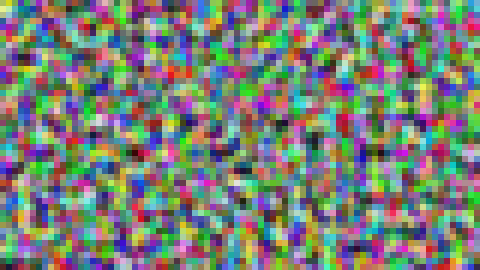

iter: 0, loss: 3, losses: 0.989, 0.0853, 0.889, 0.0623, 0.91, 0.0647 (-0=>3.001)


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


iter: 10, loss: 2.68, losses: 0.882, 0.0808, 0.81, 0.0614, 0.788, 0.0609 (-0=>2.683)


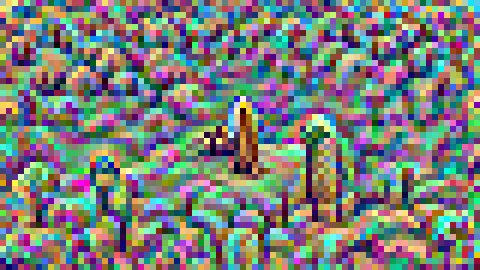

iter: 20, loss: 2.53, losses: 0.846, 0.0839, 0.746, 0.0622, 0.729, 0.0626 (-0=>2.53)
iter: 30, loss: 2.45, losses: 0.827, 0.0854, 0.71, 0.0641, 0.7, 0.0661 (-1=>2.439)


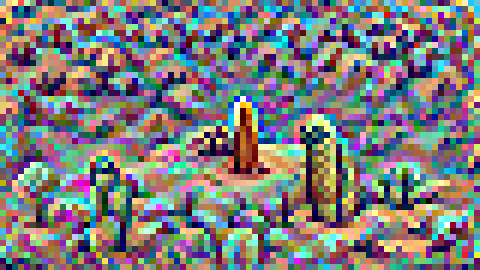

iter: 40, loss: 2.39, losses: 0.803, 0.0868, 0.691, 0.0652, 0.682, 0.0666 (-2=>2.38)
iter: 50, loss: 2.36, losses: 0.789, 0.0885, 0.675, 0.0664, 0.673, 0.0665 (-4=>2.336)


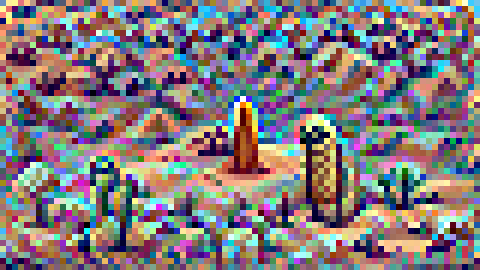

iter: 60, loss: 2.3, losses: 0.769, 0.0859, 0.662, 0.0675, 0.652, 0.0679 (-0=>2.304)
iter: 70, loss: 2.31, losses: 0.777, 0.0857, 0.659, 0.0678, 0.653, 0.0684 (-2=>2.288)


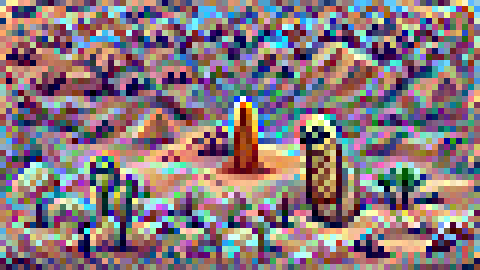

iter: 80, loss: 2.28, losses: 0.756, 0.0867, 0.651, 0.0678, 0.646, 0.0689 (-6=>2.272)
iter: 90, loss: 2.26, losses: 0.75, 0.0873, 0.648, 0.0688, 0.639, 0.0686 (-5=>2.241)


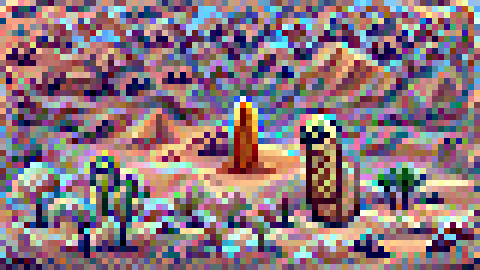

iter: 100, loss: 2.25, losses: 0.745, 0.0874, 0.646, 0.0685, 0.635, 0.0691 (-15=>2.241)
iter: 110, loss: 2.24, losses: 0.741, 0.0878, 0.642, 0.0692, 0.629, 0.0695 (-1=>2.226)


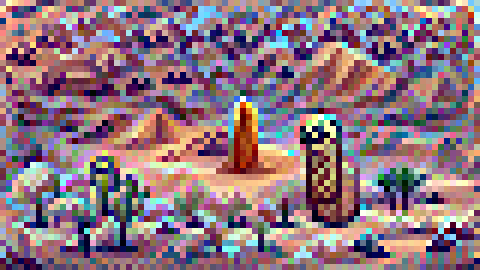

iter: 120, loss: 2.23, losses: 0.738, 0.0875, 0.636, 0.0699, 0.625, 0.0696 (-2=>2.214)
iter: 130, loss: 2.23, losses: 0.738, 0.0896, 0.635, 0.0697, 0.625, 0.0692 (-1=>2.213)


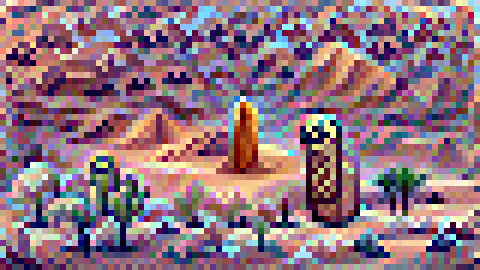

iter: 140, loss: 2.2, losses: 0.725, 0.0874, 0.63, 0.0694, 0.622, 0.0698 (-0=>2.203)
iter: 150, loss: 2.21, losses: 0.726, 0.0876, 0.633, 0.0692, 0.623, 0.0699 (-4=>2.199)


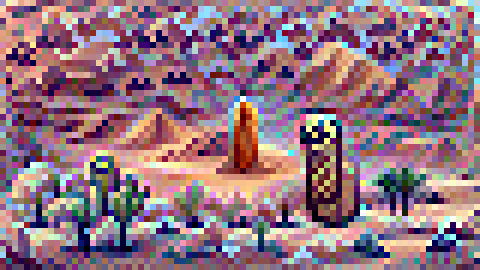

iter: 160, loss: 2.2, losses: 0.726, 0.0874, 0.63, 0.0696, 0.621, 0.0696 (-2=>2.185)
iter: 170, loss: 2.21, losses: 0.727, 0.0875, 0.63, 0.0701, 0.623, 0.0704 (-12=>2.185)


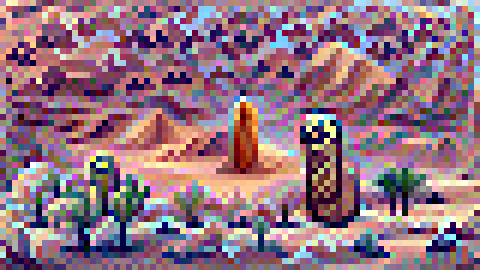

iter: 180, loss: 2.22, losses: 0.729, 0.0893, 0.635, 0.0693, 0.628, 0.0693 (-7=>2.183)
iter: 190, loss: 2.22, losses: 0.737, 0.0879, 0.633, 0.0693, 0.627, 0.0691 (-2=>2.172)


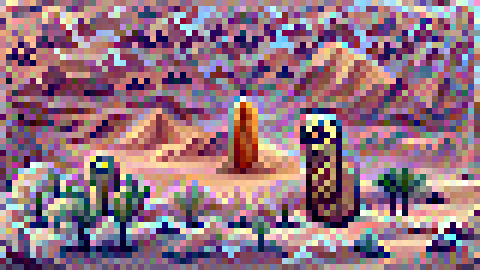

iter: 200, loss: 2.19, losses: 0.717, 0.0884, 0.627, 0.069, 0.622, 0.0689 (-12=>2.172)
iter: 210, loss: 2.19, losses: 0.72, 0.0883, 0.625, 0.0695, 0.615, 0.0697 (-7=>2.167)


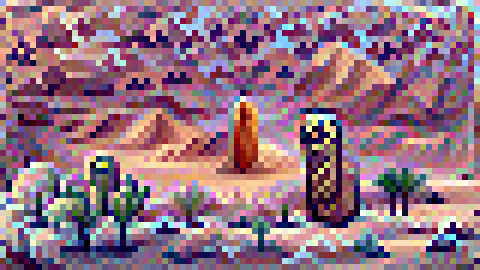

iter: 220, loss: 2.17, losses: 0.712, 0.0876, 0.625, 0.0692, 0.61, 0.0706 (-5=>2.164)
Dropping learning rate
iter: 230, loss: 2.19, losses: 0.717, 0.0886, 0.626, 0.0694, 0.619, 0.0701 (-1=>2.181)


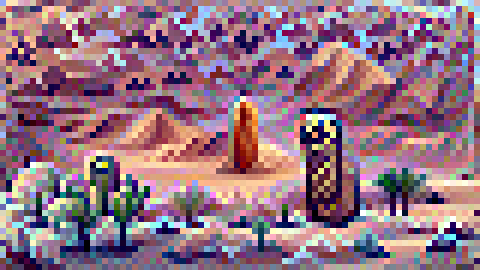

iter: 240, loss: 2.16, losses: 0.705, 0.0881, 0.617, 0.07, 0.608, 0.0707 (-5=>2.155)
iter: 250, loss: 2.16, losses: 0.705, 0.0886, 0.622, 0.0692, 0.609, 0.0704 (-2=>2.136)


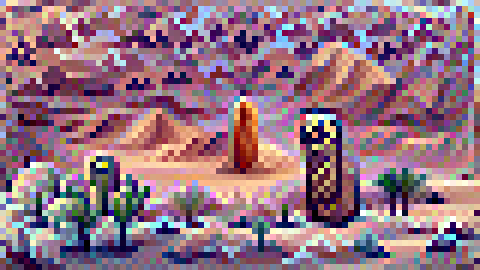

iter: 260, loss: 2.16, losses: 0.704, 0.0902, 0.62, 0.0707, 0.602, 0.0706 (-12=>2.136)
iter: 270, loss: 2.16, losses: 0.707, 0.0881, 0.616, 0.0705, 0.604, 0.0706 (-22=>2.136)


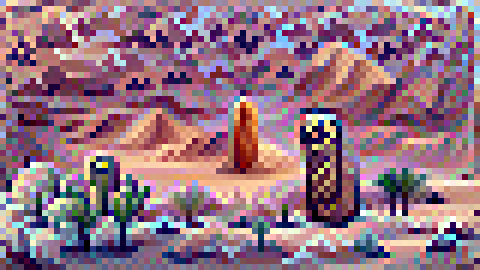

iter: 280, loss: 2.13, losses: 0.69, 0.089, 0.612, 0.0706, 0.596, 0.0715 (-0=>2.129)
iter: 290, loss: 2.17, losses: 0.709, 0.0887, 0.625, 0.0698, 0.607, 0.0703 (-10=>2.129)


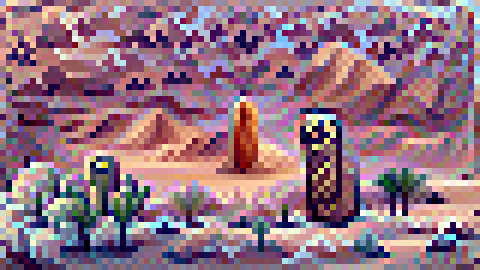

iter: 300, finished (-20=>2.129)


  0%|          | 0/41 [00:00<?, ?it/s]

In [9]:
#@title Generate pixel art{ vertical-output: true }
#pixel
pixray.run(
    "desert monolith #pixelart",
    "pixel",
    quality="better",
    scale=2.5,
)